In [1]:
from sklearn import datasets as dsets, cluster as clst, decomposition as dComp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris_data = dsets.load_iris()

In [3]:
k_values = []
intertia_scores = []
for k in range(2,10):
    model = clst.KMeans(n_clusters=k)
    model.fit(iris_data.data)
    intertia_scores.append(model.inertia_)
    k_values.append(k)
module_of_second_derivative = np.abs(np.diff(np.diff(intertia_scores)))


/home/sabih/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sabih/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sabih/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sabih/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sabih/.local/lib/python3.10/si

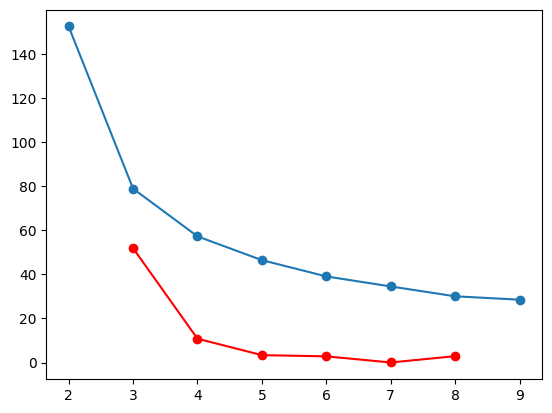

In [4]:
plt.plot(k_values, intertia_scores)
plt.scatter(k_values, intertia_scores)
plt.plot(k_values[1:-1], module_of_second_derivative, color='red')
plt.scatter(k_values[1:-1], module_of_second_derivative, color='red')
plt.show()

In [5]:
model = clst.KMeans(n_clusters=3, n_init=1, max_iter=100)
model.fit(iris_data.data)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [6]:
all_predictions = model.predict(iris_data.data)
centroids = model.cluster_centers_
centroids.shape

(3, 4)

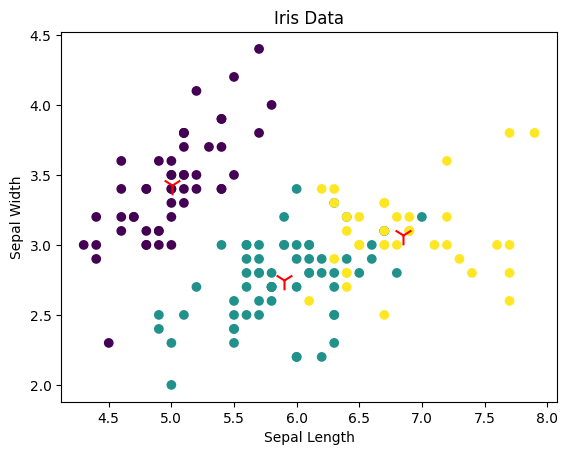

In [7]:
plt.scatter(iris_data.data[:, 0], iris_data.data[:, 1], c=all_predictions)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='1', s=200, c='red')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Data')
plt.show()

In [8]:
pca = dComp.PCA(n_components=2)
x_reduced = pca.fit_transform(iris_data.data)
x_reduced.shape

(150, 2)

In [9]:
model_pca = clst.KMeans(n_clusters=3, n_init=1, max_iter=100)
model_pca.fit(x_reduced)
all_predictions_pca = model_pca.predict(x_reduced)
centroids_pca = model_pca.cluster_centers_

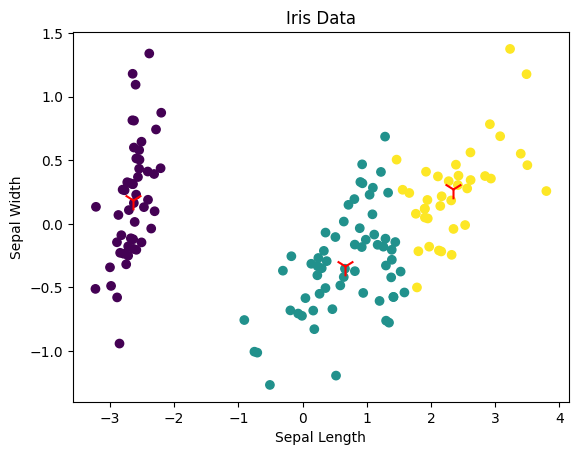

In [10]:
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=all_predictions)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='1', s=200, c='red')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Data')
plt.show()

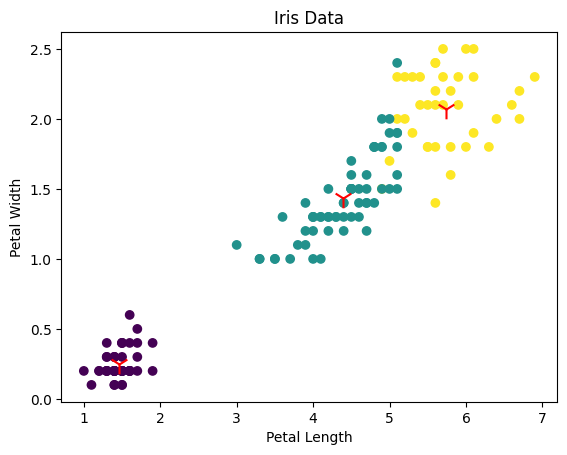

In [11]:

plt.scatter(iris_data.data[:, 2], iris_data.data[:, 3], c=all_predictions)
plt.scatter(centroids[:, 2], centroids[:, 3], marker='1', s=200, c='red')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris Data')
plt.show()

In [12]:
type(iris_data)
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
iris_data.data[:, 0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [15]:
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

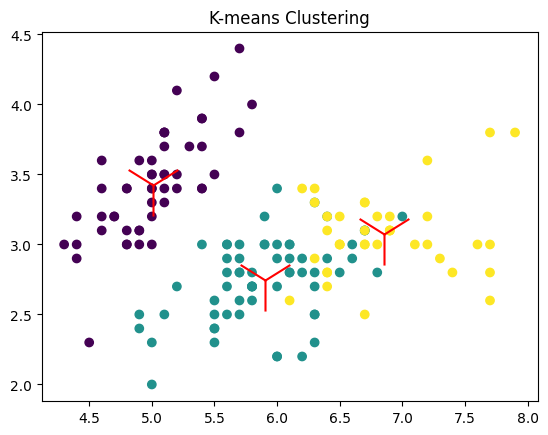

In [16]:
import matplotlib.pyplot as plt
plt.scatter(iris_data.data[:, 0], iris_data.data[:, 1], c=all_predictions)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='1',  s=2000, c='red')  # Plotting the centroids
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()

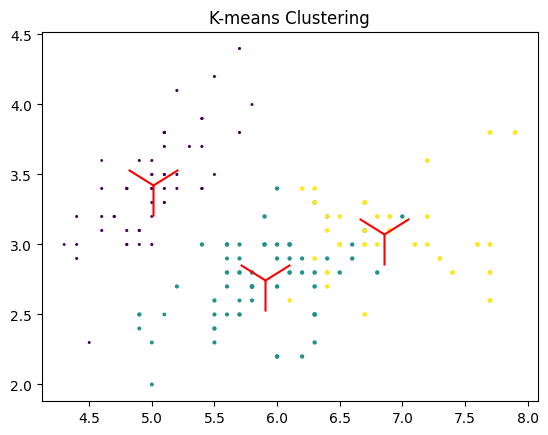

In [17]:
import matplotlib.pyplot as plt
plt.scatter(iris_data.data[:, 0], iris_data.data[:, 1], iris_data.data[:,2], c=all_predictions)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='1',  s=2000, c='red')  # Plotting the centroids
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()

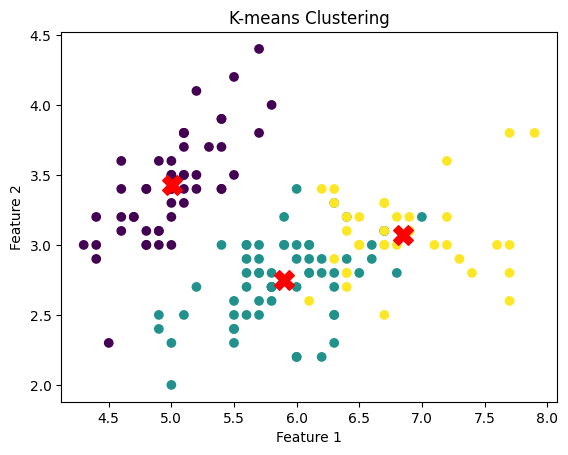

In [18]:
import matplotlib.pyplot as plt
plt.scatter(iris_data.data[:, 0], iris_data.data[:, 1], c=all_predictions)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red')  # Plotting the centroids
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()

In [19]:
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable


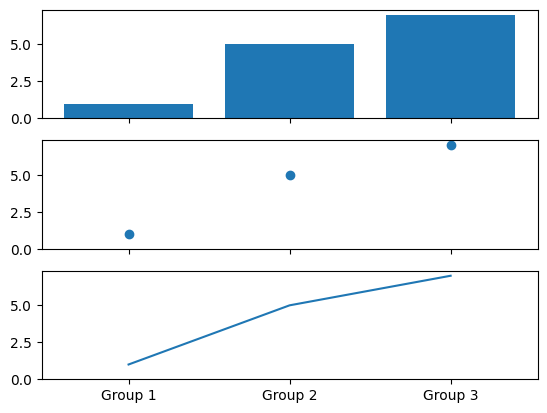

In [20]:
import matplotlib.pyplot as plt
groups = ['Group 1', 'Group 2', 'Group 3']
values = [1, 5, 7]
fig, axs = plt.subplots(3, sharex=True, sharey=True)
axs[0].bar(groups, values)
axs[1].scatter(groups, values)
axs[2].plot(groups, values)
plt.show()

In [21]:
from sklearn import datasets
import matplotlib.pyplot as plt
iris_data = datasets.load_iris()
data = iris_data.data
target = iris_data.target


In [22]:
!pip3 install plotly
!pip3 install --upgrade nbformat


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [23]:
import plotly.express as px
from sklearn import datasets

iris_data = datasets.load_iris()
data = iris_data.data

# Create a DataFrame from the data
df = px.data.iris()
df['target'] = iris_data.target

# Use plotly express to create a scatter plot
fig = px.scatter_matrix(data_frame= df, dimensions=["sepal_length","sepal_width",""], color="target", title="Iris Data")

# Show the plot
fig.show()


ValueError: Value of 'dimensions_2' is not the name of a column in 'data_frame'. Expected one of ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species', 'species_id', 'target'] but received: 

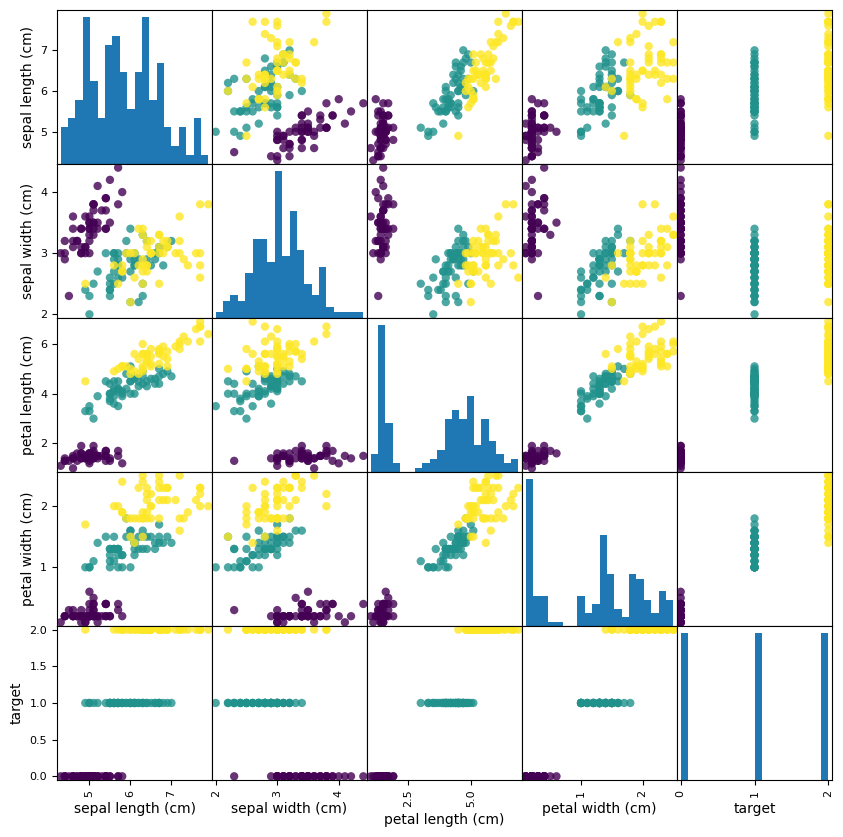

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from pandas.plotting import scatter_matrix
iris_data = datasets.load_iris()
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df['target'] = iris_data.target
scatter_matrix(df, c=df['target'], figsize=(10, 10), marker='o', hist_kwds={'bins': 20}, alpha=0.8)
plt.show()


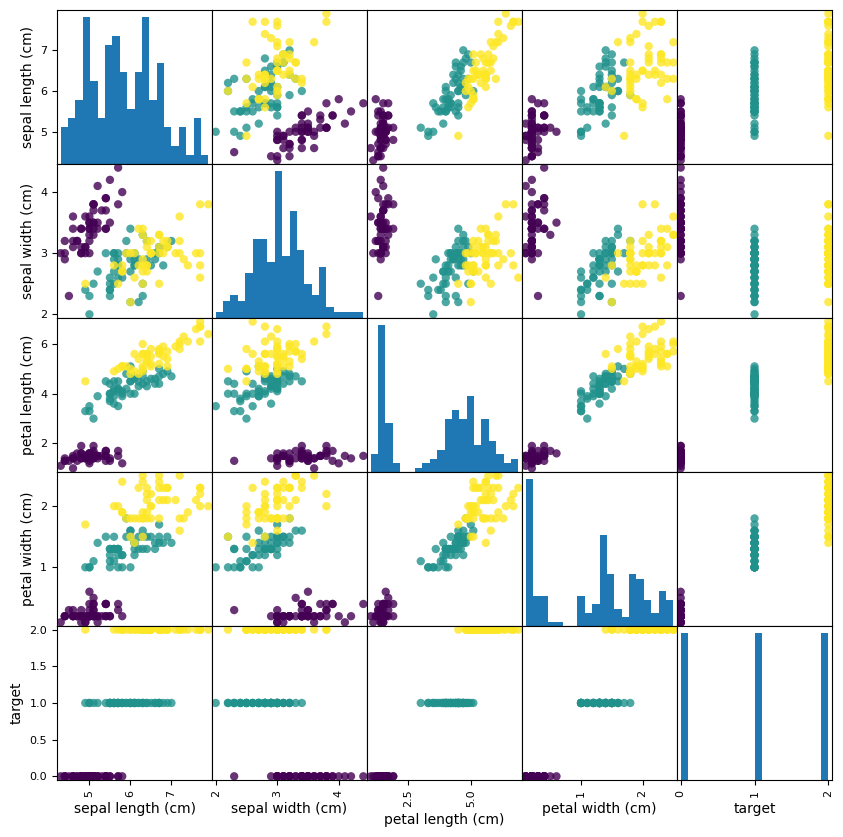

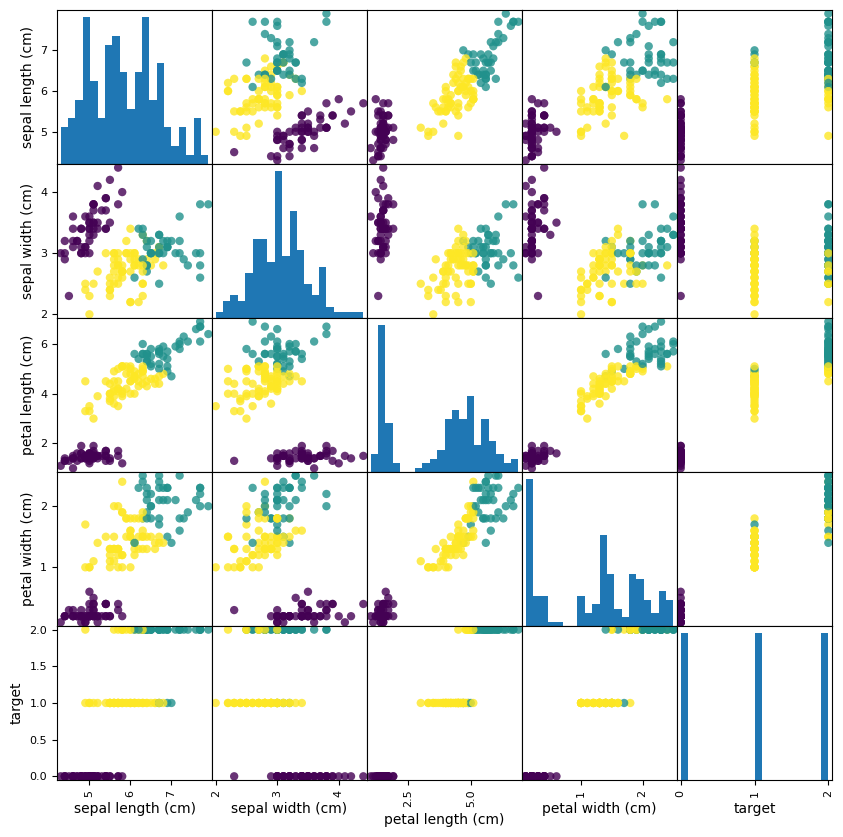

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans

iris_data = datasets.load_iris()
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df['target'] = iris_data.target

scatter_matrix(df, c=df['target'], figsize=(10, 10), marker='o', hist_kwds={'bins': 20}, alpha=0.8)
plt.show()

X = df.drop('target', axis=1)

kmeans = KMeans(n_clusters=3, n_init=1,max_iter=100)
kmeans.fit(X)

labels = kmeans.labels_

scatter_matrix(df, c=labels, figsize=(10, 10), marker='o', hist_kwds={'bins': 20}, alpha=0.8)
plt.show()
